In [1]:
!pip install -q darts

     |████████████████████████████████| 253 kB 4.1 MB/s 
     |████████████████████████████████| 9.9 MB 25.1 MB/s 
     |████████████████████████████████| 788 kB 59.5 MB/s 
     |████████████████████████████████| 1.4 MB 18.2 MB/s 
     |████████████████████████████████| 2.0 MB 19.7 MB/s 
     |████████████████████████████████| 177 kB 51.1 MB/s 
     |████████████████████████████████| 9.8 MB 41.5 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 62 kB 856 kB/s 
     |████████████████████████████████| 22.3 MB 73.5 MB/s 
     |████████████████████████████████| 10.3 MB 43.0 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 155 kB 61.9 MB/s 
     |████████████████████████████████| 374 kB 55.7 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 214 kB 55.1 MB/s 
ERROR: pip's depend

In [2]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 2.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.12.0 requires matplotlib>=3.4.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [22]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/airline-passengers.csv')

In [11]:
series = TimeSeries.from_dataframe(df,'Month','Passengers')

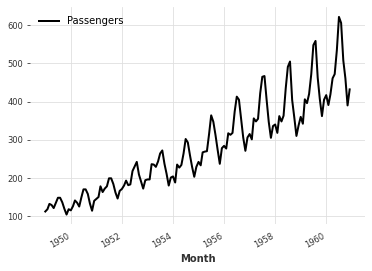

In [12]:
series.plot()

In [13]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('1959-01-01'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [14]:
my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=12,
    force_reset=True
)

In [15]:
my_model.fit(train_transformed,
             verbose=True)

[2021-10-22 03:34:35,175] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 101 samples.
[2021-10-22 03:34:35,175] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 101 samples.
[2021-10-22 03:34:35,188] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 03:34:35,188] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  0%|          | 2/500 [00:00<00:43, 11.55it/s]

  2%|▏         | 12/500 [00:01<00:40, 12.01it/s]

  4%|▍         | 22/500 [00:01<00:40, 11.92it/s]

  6%|▋         | 32/500 [00:02<00:39, 11.80it/s]

  8%|▊         | 42/500 [00:03<00:37, 12.20it/s]

 10%|█         | 52/500 [00:04<00:36, 12.36it/s]

 12%|█▏        | 62/500 [00:05<00:35, 12.22it/s]

 14%|█▍        | 72/500 [00:05<00:35, 12.12it/s]

 16%|█▋        | 82/500 [00:06<00:35, 11.86it/s]

 18%|█▊        | 92/500 [00:07<00:33, 12.15it/s]

 20%|██        | 102/500 [00:08<00:33, 11.95it/s]

 22%|██▏       | 112/500 [00:09<00:31, 12.31it/s]

 24%|██▍       | 122/500 [00:10<00:30, 12.48it/s]

 26%|██▋       | 132/500 [00:10<00:30, 12.11it/s]

 28%|██▊       | 142/500 [00:11<00:28, 12.52it/s]

 30%|███       | 152/500 [00:12<00:28, 12.34it/s]

 32%|███▏      | 162/500 [00:13<00:27, 12.23it/s]

 34%|███▍      | 172/500 [00:14<00:26, 12.34it/s]

 36%|███▋      | 182/500 [00:14<00:25, 12.31it/s]

 38%|███▊      | 192/500 [00:15<00:25, 12.28it/s]

 40%|████      | 202/500 [00:16<00:24, 12.17it/s]

 42%|████▏     | 212/500 [00:17<00:23, 12.24it/s]

 44%|████▍     | 222/500 [00:18<00:23, 11.98it/s]

 46%|████▋     | 232/500 [00:19<00:22, 12.16it/s]

 48%|████▊     | 242/500 [00:19<00:20, 12.52it/s]

 50%|█████     | 252/500 [00:20<00:20, 12.31it/s]

 52%|█████▏    | 262/500 [00:21<00:19, 12.22it/s]

 54%|█████▍    | 272/500 [00:22<00:18, 12.39it/s]

 56%|█████▋    | 282/500 [00:23<00:17, 12.15it/s]

 58%|█████▊    | 292/500 [00:23<00:17, 12.23it/s]

 60%|██████    | 302/500 [00:24<00:15, 12.39it/s]

 62%|██████▏   | 312/500 [00:25<00:15, 12.01it/s]

 64%|██████▍   | 322/500 [00:26<00:14, 12.07it/s]

 66%|██████▋   | 332/500 [00:27<00:13, 12.06it/s]

 68%|██████▊   | 342/500 [00:28<00:13, 11.75it/s]

 70%|███████   | 352/500 [00:28<00:12, 11.76it/s]

 72%|███████▏  | 362/500 [00:29<00:11, 12.38it/s]

 74%|███████▍  | 372/500 [00:30<00:10, 12.26it/s]

 76%|███████▋  | 382/500 [00:31<00:09, 12.16it/s]

 78%|███████▊  | 392/500 [00:32<00:09, 11.88it/s]

 80%|████████  | 402/500 [00:33<00:07, 12.33it/s]

 82%|████████▏ | 412/500 [00:33<00:07, 12.31it/s]

 84%|████████▍ | 422/500 [00:34<00:06, 12.27it/s]

 86%|████████▋ | 432/500 [00:35<00:05, 11.96it/s]

 88%|████████▊ | 442/500 [00:36<00:04, 12.07it/s]

 90%|█████████ | 452/500 [00:37<00:04, 12.00it/s]

 92%|█████████▏| 462/500 [00:38<00:03, 12.23it/s]

 94%|█████████▍| 472/500 [00:38<00:02, 12.22it/s]

 96%|█████████▋| 482/500 [00:39<00:01, 11.96it/s]

 98%|█████████▊| 492/500 [00:40<00:00, 12.10it/s]

100%|██████████| 500/500 [00:41<00:00, 12.14it/s]


In [16]:
predicted = my_model.predict(n=len(val_transformed))

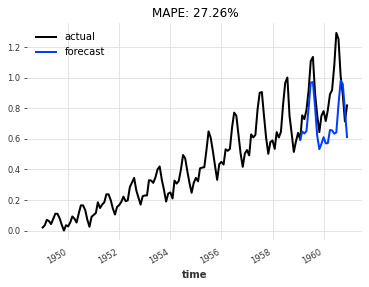

In [23]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()